<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform
#### Big Data From Space 2023
Exploring bottom of atmosphere data

### Connect to openEO Platform using python

In [1]:
import openeo
from openeo.processes import *

In [2]:
conn = openeo.connect("openeo.cloud") 

In [3]:
conn = conn.authenticate_oidc()

Authenticated using refresh token.


### Look at the collection description

In [4]:
conn.describe_collection("boa_sentinel_2")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B08',
    'B11',
    'B12']},
  't': {'extent': [['2015-07-04T12:00:00+00:00', '2021-06-22T12:00:00+00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [4100000.0, 5500000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [900000.0, 2200000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'Preprocessed analysis-ready-data (ARD) from Sentinel-2 processed with FORCE. ARD data can only be combined with other ARD data or loaded results of previous processed jobs. ARD data cannot be combined with Level-1 collections! As this is Level-2 (ARD) data, ARD processes (``ard_normalized_radar_backscatter()``, ``ard_surface_reflectance()``, ``sar_backscatter()``, ``atmospheric_correction()``) cannot be applied.',
 'extent': {'spatial': {'bbox': [[1.4211922929976784,
     41.388795496730424,
     19.38022689396854,
     52.43260595832486]]},
  'temporal': {'interval': [['2015-07-04T12:00:00Z',
     '2021-06-22T12:00:00Z']]}},
 'id': 'boa_sentinel_2',
 'item_assets': {'cloud': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud state is available in bit 1-2.',
   'file:values': {'0': {'summary': 'clear', 'values': [0]},
    '1': {'summary': 'less confident cloud (i.e., buffered cloud)',
     'values': [1]},
    '2': {'summary': 'confident, opaque cloud', 'values': [2]},
    '3': {'summary': 'cirrus', 'values': [3]}},
   'roles': ['cloud', 'metadata'],
   'type': 'image/tiff; application=geotiff'},
  'cloud_shadow': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud-shadow flag is available in bit 3.',
   'file:values': {'0': {'summary': 'no - no cloud-shadow on pixel',
     'values': [0]},
    '1': {'summary': 'yes - cloud-shadow on pixel', 'values': [1]}},
   'roles': ['cloud-shadow', 'metadata'],
   'type': 'image/tiff; application=geotiff'},
  'saturation': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The saturation flag is available in bit 9.',
   'file:values': {'0': {'summary': 'no - pixel is NOT saturated',
     'values': [0]},
    '1': {'summary': 'yes - pixel is saturated', 'values': [1]}},
   'roles': ['saturation', 'metadata'],
   'type': 'image/tiff; application=geotiff'}},
 'keywords': ['EODC', 'MSI', 'ESA', 'Copernicus', 'Sentinel-2', 'Level-2'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'about'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections', 'rel': 'cloud'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'snow-ice'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'land-water'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'water-vapor'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'cloud-shadow'},
  {'href': 'https://openeo.eodc.eu/openeo/1.1.0/collections',
   'rel': 'card4l-document'},
 

### Start creating an openEO process graph
#### Pick a spatial extent of interest

In [5]:
spatial_extent = {'west': 16.2401, 'south': 48.1541, 'east': 16.5595, 'north': 48.2458}

#### Load the bottom of atmosphere Sentinel 2 collection

In [6]:
data = conn.load_collection('boa_sentinel_2', spatial_extent = spatial_extent, temporal_extent = ["2020-02-01","2020-12-01"], bands=["B02","B03","B04"])

#### Aggregate the data for one month using a median

In [7]:
data_t = data.aggregate_temporal_period(period="month", reducer=median)

#### Save the result as a netCDF

In [8]:
saved_data = data_t.save_result(format="NetCDF")
saved_data.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['B02', 'B03', 'B04'],
   'id': 'boa_sentinel_2',
   'spatial_extent': {'west': 16.2401,
    'south': 48.1541,
    'east': 16.5595,
    'north': 48.2458},
   'temporal_extent': ['2020-02-01', '2020-12-01']}},
 'aggregatetemporalperiod1': {'process_id': 'aggregate_temporal_period',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'period': 'month',
   'reducer': {'process_graph': {'median1': {'process_id': 'median',
      'arguments': {'data': {'from_parameter': 'data'}},
      'result': True}}}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'aggregatetemporalperiod1'},
   'format': 'NetCDF',
   'options': {}},
  'result': True}}

#### Create and start a job

In [9]:
job = saved_data.create_job()
job.start_job()

<BatchJob job_id='eodc-c48ca978-4104-44ed-a7e9-4e2a1a3bd232'>

In [11]:
job

<BatchJob job_id='eodc-c48ca978-4104-44ed-a7e9-4e2a1a3bd232'>

#### Download the results, when the job is finished

#### Look at the results using python matplotlib

In [14]:
from utils import *

path = "./boa/"
output_s2 = load_data(path)

output_s2

<xarray.Dataset>
Dimensions:      (t: 10, y: 1262, x: 2468)
Coordinates:
  * y            (y) float64 1.623e+06 1.623e+06 1.623e+06 ... 1.61e+06 1.61e+06
  * x            (x) float64 5.26e+06 5.26e+06 5.26e+06 ... 5.285e+06 5.285e+06
    spatial_ref  int32 0
  * t            (t) datetime64[ns] 2020-02-29 2020-03-31 ... 2020-11-30
Data variables:
    B02          (t, y, x) float32 dask.array<chunksize=(1, 1262, 2468), meta=np.ndarray>
    B03          (t, y, x) float32 dask.array<chunksize=(1, 1262, 2468), meta=np.ndarray>
    B04          (t, y, x) float32 dask.array<chunksize=(1, 1262, 2468), meta=np.ndarray>
Attributes:
    crs:           PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_...
    grid_mapping:  spatial_ref
    nodata:        -9999

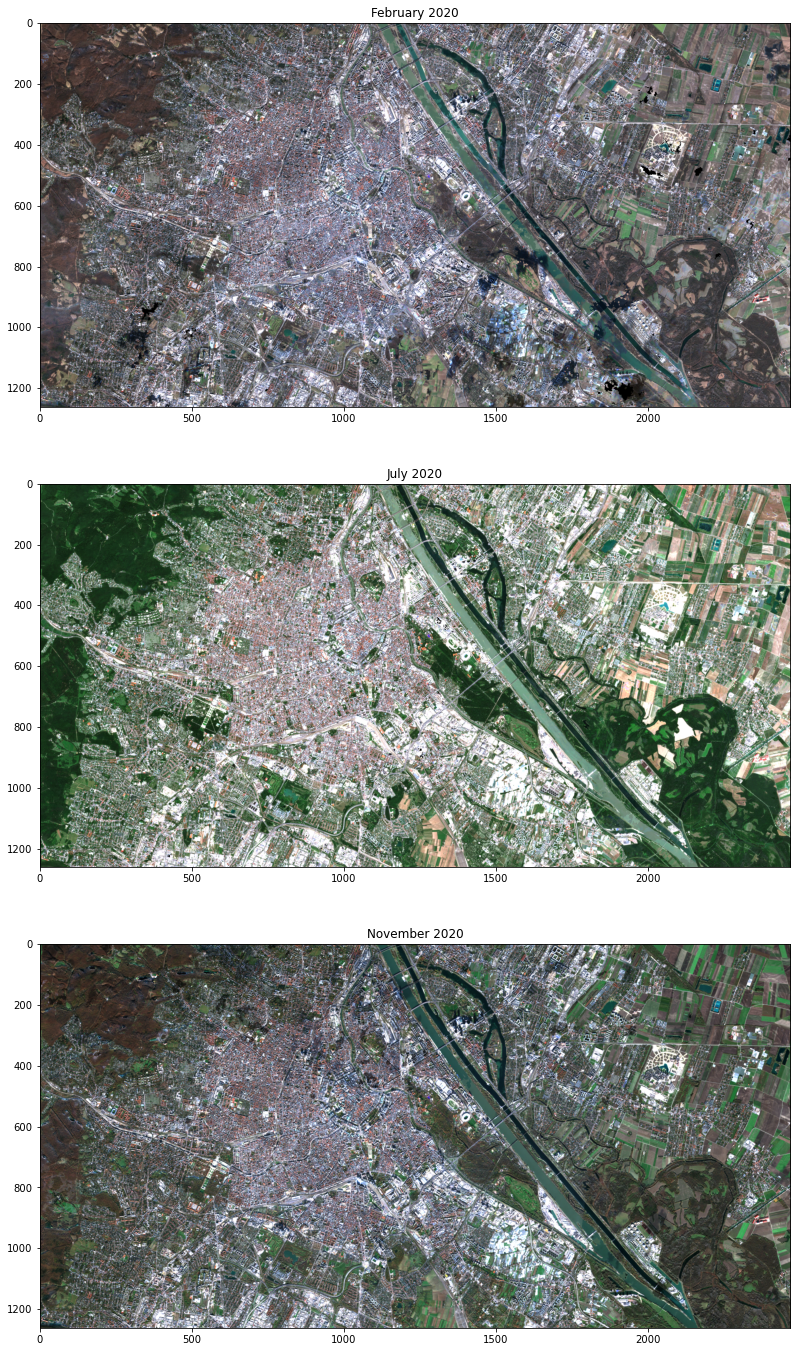

In [19]:
plt.figure(figsize=(24,24))

plt.subplot(3,1,1)
output = output_s2.isel(t=0)
plt.title("February 2020")
plt.imshow(tone_mapping(output.B04,output.B03,output.B02), cmap='brg')

plt.subplot(3,1,2)
output = output_s2.isel(t=5)
plt.title("July 2020")
plt.imshow(tone_mapping(output.B04,output.B03,output.B02), cmap='brg')

plt.subplot(3,1,3)
output = output_s2.isel(t=9)
plt.title("November 2020")
plt.imshow(tone_mapping(output.B04,output.B03,output.B02), cmap='brg')